In [ ]:
! pip install pandas sklearn numpy matplotlib

In [13]:
#imports 
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Data loading and refining

In [4]:

df = pd.read_csv('country_violations_year_month_2014-2023.csv')

# Map month names to numerical values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

df['MONTH'] = df['MONTH'].map(month_mapping)

# Select relevant columns for clustering
X = df[['YEAR', 'MONTH', 'VIOLATION_COUNT']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Perform K-means clustering with different values of K

In [16]:
# with K = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster_5'] = kmeans_5.fit_predict(X_scaled)

# with K = 10
kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init=10)
df['Cluster_10'] = kmeans_10.fit_predict(X_scaled)

# with K = 12
kmeans_12 = KMeans(n_clusters=12, random_state=42, n_init=10)
df['Cluster_12'] = kmeans_12.fit_predict(X_scaled)


## Centroids for each cluster

In [17]:
# Print centroids for each cluster
print("Centroids for K = 5:")
print(scaler.inverse_transform(kmeans_5.cluster_centers_))
print("\nCentroids for K = 10:")
print(scaler.inverse_transform(kmeans_10.cluster_centers_))
print("\nCentroids for K = 12:")
print(scaler.inverse_transform(kmeans_12.cluster_centers_))

Centroids for K = 5:
[[2015.97731959    3.54037113    2.53921649]
 [2020.8033142     9.31939781    2.42283115]
 [2015.92318788    9.43806347    2.54769203]
 [2021.00819508    3.50129922    2.37107735]
 [2018.875         6.625       145.35      ]]

Centroids for K = 10:
[[2.02126829e+03 2.75651568e+00 2.00808362e+00]
 [2.01544556e+03 1.05112691e+01 2.09639390e+00]
 [2.01497084e+03 6.30827495e+00 2.14107177e+00]
 [2.01875000e+03 6.50000000e+00 4.09250000e+02]
 [2.02193078e+03 7.84851673e+00 2.04418262e+00]
 [2.01869565e+03 6.54347826e+00 1.06043478e+02]
 [2.01836047e+03 6.11766618e+00 2.00650089e+00]
 [2.01797581e+03 6.36290323e+00 2.48333333e+01]
 [2.01968496e+03 1.06697768e+01 2.03585803e+00]
 [2.01597495e+03 2.37967914e+00 2.10638897e+00]]

Centroids for K = 12:
[[2.02076042e+03 6.70694981e+00 1.97934363e+00]
 [2.01491090e+03 1.03251140e+01 2.06817240e+00]
 [2.01820000e+03 6.40000000e+00 3.01200000e+02]
 [2.01890161e+03 2.96897578e+00 2.01466213e+00]
 [2.01800635e+03 1.02709313e+01 2.

## Cluster description

In [19]:
# for K = 5
for cluster in range(5):
    cluster_data = df[df['Cluster_5'] == cluster]
    print(f"\nCluster {cluster} (K = 5):")
    print(cluster_data.describe())

# for K = 10
for cluster in range(10):
    cluster_data = df[df['Cluster_10'] == cluster]
    print(f"\nCluster {cluster} (K = 10):")
    print(cluster_data.describe())

# for K = 12
for cluster in range(12):
    cluster_data = df[df['Cluster_12'] == cluster]
    print(f"\nCluster {cluster} (K = 12):")
    print(cluster_data.describe())





Cluster 0 (K = 5):
               YEAR         MONTH  VIOLATION_COUNT  Cluster_5    Cluster_10  \
count  12125.000000  12125.000000     12125.000000    12125.0  12125.000000   
mean    2015.977320      3.540371         2.539216        0.0      6.825567   
std        1.383338      1.690540         4.243113        0.0      2.900672   
min     2014.000000      1.000000         1.000000        0.0      2.000000   
25%     2015.000000      2.000000         1.000000        0.0      6.000000   
50%     2016.000000      4.000000         1.000000        0.0      9.000000   
75%     2017.000000      5.000000         2.000000        0.0      9.000000   
max     2018.000000      6.000000        71.000000        0.0      9.000000   

         Cluster_12  Optimal_Cluster  
count  12125.000000     12125.000000  
mean       5.947216         4.957443  
std        2.140947         0.410402  
min        3.000000         1.000000  
25%        5.000000         5.000000  
50%        5.000000         5.0000

## Elbow Analysis to find optimal cluster size

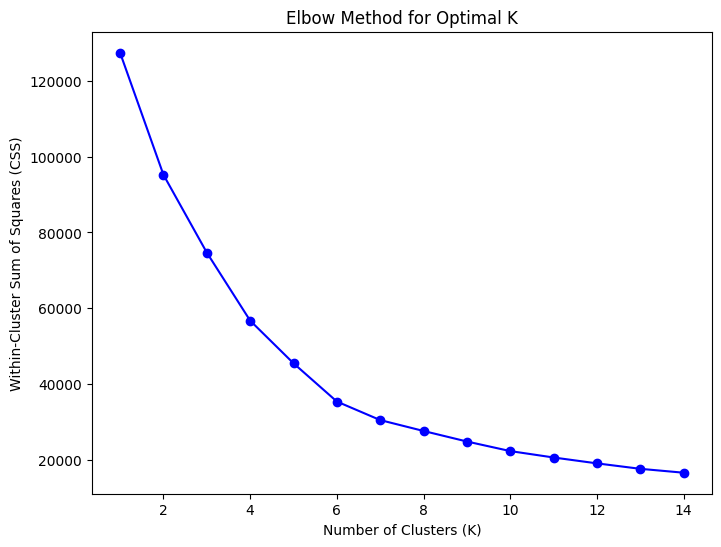

In [20]:
max_clusters = 15
css = []  # within-cluster sum of squares

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=200, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    css.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters), css, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (CSS)')
plt.show()

## Determine Optimal K

In [12]:
optimal_k = int(input("Enter the optimal number of clusters (K) from the elbow plot: "))

# Re-run clustering with optimal K
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=200, n_init=10, random_state=0)
df['Optimal_Cluster'] = kmeans_optimal.fit_predict(X_scaled)

# Print centroids for optimal clustering
print(f"Centroids for Optimal K ({optimal_k}):")
print(scaler.inverse_transform(kmeans_optimal.cluster_centers_))

# Describe each cluster for optimal K
for cluster in range(optimal_k):
    cluster_data = df[df['Optimal_Cluster'] == cluster]
    print(f"\nCluster {cluster} (Optimal K):")
    print(cluster_data.describe())

Centroids for Optimal K (6):
[[2021.01078086    3.50115869    2.11939547]
 [2017.95248869    6.33031674   38.03167421]
 [2015.92508885    9.43625262    2.23885902]
 [2020.80522176    9.32182652    2.17216517]
 [2018.83333333    6.          353.16666667]
 [2015.97265755    3.54284762    2.2124875 ]]

Cluster 0 (Optimal K):
              YEAR        MONTH  VIOLATION_COUNT  Cluster_5   Cluster_10  \
count  9925.000000  9925.000000      9925.000000     9925.0  9925.000000   
mean   2021.010781     3.501159         2.119395        3.0     1.478186   
std       1.421670     1.697178         2.445981        0.0     2.443528   
min    2019.000000     1.000000         1.000000        3.0     0.000000   
25%    2020.000000     2.000000         1.000000        3.0     0.000000   
50%    2021.000000     3.000000         1.000000        3.0     0.000000   
75%    2022.000000     5.000000         2.000000        3.0     4.000000   
max    2023.000000     6.000000        21.000000        3.0     7.00